In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
diabetes_data = pd.read_csv('data/diabetes_data.csv')

In [3]:
# Pregnancies — количество беременностей.
# Glucose — концентрация глюкозы в плазме через два часа при пероральном тесте на толерантность к глюкозе.
# BloodPressure — диастолическое артериальное давление (мм рт. ст.).
# SkinThickness — толщина кожной складки трицепса (мм).
# Insulin — двухчасовой сывороточный инсулин (ме Ед/мл).
# BMI — индекс массы тела.
# DiabetesPedigreeFunction — функция родословной диабета (чем она выше, тем выше шанс наследственной заболеваемости).
# Age — возраст.
# Outcome — наличие диабета (0 — нет, 1 — да).

In [4]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female


In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               778 non-null    int64  
 1   Glucose                   778 non-null    int64  
 2   BloodPressure             778 non-null    int64  
 3   SkinThickness             778 non-null    int64  
 4   Insulin                   778 non-null    int64  
 5   BMI                       778 non-null    float64
 6   DiabetesPedigreeFunction  778 non-null    float64
 7   Age                       778 non-null    int64  
 8   Outcome                   778 non-null    int64  
 9   Gender                    778 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.9+ KB


In [6]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000,778.000000
mean,3.848329,120.822622,69.035990,20.457584,79.521851,31.982262,0.470871,33.317481,0.344473
std,3.360782,31.883264,19.432323,15.954452,114.862405,7.853917,0.330669,11.816300,0.475502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.241500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,27.000000,32.000000,0.370000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
def get_low_inform_features_list(df, level=0.95):
    """
    Метод для получения списка признаков с низкой информативностью
    
    :param df: Датафрейм для анализа признаков
    :param level: Уровень попадания в низкоинформативные, по умолчанию 0.95
    :return: Возвращает список признаков датафрейма, которые имеют низкую информативность
    """
    
    # список неинформативных признаков
    low_inform_features = []

    # цикл по всем столбцам
    for col in df.columns:
        # наибольшая относительная частота в признаке
        top_freq = df[col].value_counts(normalize=True).max()
        # доля уникальных значений от размера признака
        nunique_ratio = df[col].nunique() / df[col].count()

        # сравниваем наибольшую частоту с порогом
        if top_freq > level:
            low_inform_features.append(col)
            print(f'{col}: {round(top_freq * 100, 2)}% одинаковых значений')
        # сравниваем долю уникальных значений с порогом
        elif nunique_ratio > level:
            low_inform_features.append(col)
            print(f'{col}: {round(nunique_ratio * 100, 2)}% уникальных значений')

    return low_inform_features

In [8]:
get_low_inform_features_list(diabetes_data)

Gender: 100.0% одинаковых значений


['Gender']

In [9]:
diabetes_data['Outcome'].value_counts(normalize=True)

0    0.655527
1    0.344473
Name: Outcome, dtype: float64

In [10]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Gender
0,6,98,58,33,190,34.0,0.430,43,0,Female
1,2,112,75,32,0,35.7,0.148,21,0,Female
2,2,108,64,0,0,30.8,0.158,21,0,Female
3,8,107,80,0,0,24.6,0.856,34,0,Female
4,7,136,90,0,0,29.9,0.210,50,0,Female
...,...,...,...,...,...,...,...,...,...,...
773,6,103,72,32,190,37.7,0.324,55,0,Female
774,1,71,48,18,76,20.4,0.323,22,0,Female
775,0,117,0,0,0,33.8,0.932,44,0,Female
776,4,154,72,29,126,31.3,0.338,37,0,Female


In [11]:
# Начнём с поиска дубликатов в данных. 
# Найдите все повторяющиеся строки в данных и удалите их. 
# Для поиска используйте все признаки в данных. 
# Сколько записей осталось в данных?

In [12]:
diabetes_clean = diabetes_data.drop_duplicates()
diabetes_clean.shape[0]

768

In [13]:
# Далее найдите все неинформативные признаки в данных и избавьтесь от них. 
# В качестве порога информативности возьмите 0.99: удалите все признаки, 
# для которых 99 % значений повторяются или 99 % записей уникальны. 
# В ответ запишите имена признаков, которые вы нашли (без кавычек).
low_inform_features_list = get_low_inform_features_list(diabetes_clean, level=0.99)

Gender: 100.0% одинаковых значений


In [14]:
col = list(diabetes_clean.columns)
col

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome',
 'Gender']

In [15]:
# Удяляю из списка всех фитч, те, которые определены как малоинформативные
for col_to_del in low_inform_features_list:
    col.remove(col_to_del)

In [16]:
diabetes_clean = diabetes_clean[col]
diabetes_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98,58,33,190,34.0,0.430,43,0
1,2,112,75,32,0,35.7,0.148,21,0
2,2,108,64,0,0,30.8,0.158,21,0
3,8,107,80,0,0,24.6,0.856,34,0
4,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139,64,35,140,28.6,0.411,26,0
764,1,96,122,0,0,22.4,0.207,27,0
765,10,101,86,37,0,45.6,1.136,38,1
766,0,141,0,0,0,42.4,0.205,29,1


In [17]:
# Смотрю сколько пропусков в каждом столбце в %
diabetes_clean.isnull().mean() * 100

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [18]:
# Ничего не найдёте. А они есть! Просто они скрыты от наших глаз. 
# В таблице пропуски в столбцах Glucose, BloodPressure, SkinThickness, Insulin и BMI обозначены нулём, 
# поэтому традиционные методы поиска пропусков ничего вам не покажут. Давайте это исправим!
diabetes_clean[diabetes_clean['Glucose'] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
251,1,0,74,20,23,27.7,0.299,21,0
306,1,0,68,35,0,32.0,0.389,22,0
329,1,0,48,20,0,24.7,0.140,22,0
370,5,0,80,32,0,41.0,0.346,37,1
653,6,0,68,41,0,39.0,0.727,41,1


In [19]:
col_to_fix_zeroes = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [20]:
# Заполняю в указанных столбцах 0
for col in col_to_fix_zeroes:
    diabetes_clean[col].replace(0, np.nan, inplace=True)

In [21]:
# Какая доля пропусков содержится в столбце Insulin? Ответ округлите до сотых.
round(diabetes_clean['Insulin'].isna().mean(), 2)


0.49

In [22]:
round(diabetes_clean['Glucose'].isna().mean(), 2)

0.01

In [23]:
# Удалите из данных признаки, где число пропусков составляет более 30 %. 
# Сколько признаков осталось в ваших данных (с учетом удаленных неинформативных признаков в задании 8.2)?
all_columns = diabetes_clean.columns
columns_to_del = []
for col in all_columns:
    if diabetes_clean[col].isna().mean() * 100 > 30:
        columns_to_del.append(col)

In [24]:
columns_to_del

['Insulin']

In [25]:
diabetes_clean.drop(columns=columns_to_del, axis=1, inplace=True)

In [26]:
diabetes_clean.shape[1]

8

In [27]:
diabetes_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,45.6,1.136,38,1
766,0,141.0,NaN,NaN,42.4,0.205,29,1


In [28]:
# Удалите из данных только те строки, в которых содержится более двух пропусков одновременно. 
# Чему равно результирующее число записей в таблице?
cols = diabetes_clean.shape[1]
diabetes_clean.dropna(how='any', axis=0, thresh=cols-2, inplace=True)

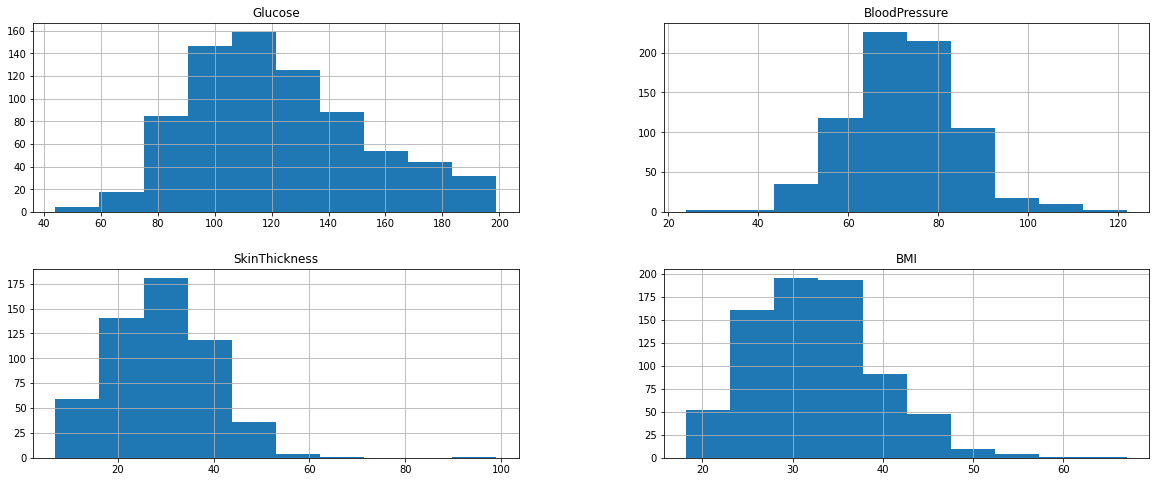

In [29]:
diabetes_clean[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].hist(figsize=(20, 8));

In [30]:
diabetes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   756 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   BMI                       757 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


In [31]:
# В оставшихся записях замените пропуски на медиану.
values = {
    'Glucose': diabetes_clean['Glucose'].median(), 
    'BloodPressure': diabetes_clean['BloodPressure'].median(), 
    'SkinThickness': diabetes_clean['SkinThickness'].median(), 
    'BMI': diabetes_clean['BMI'].median(), 
}

diabetes_clean.fillna(value=values, inplace=True)

In [32]:
diabetes_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 761 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               761 non-null    int64  
 1   Glucose                   761 non-null    float64
 2   BloodPressure             761 non-null    float64
 3   SkinThickness             761 non-null    float64
 4   BMI                       761 non-null    float64
 5   DiabetesPedigreeFunction  761 non-null    float64
 6   Age                       761 non-null    int64  
 7   Outcome                   761 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 53.5 KB


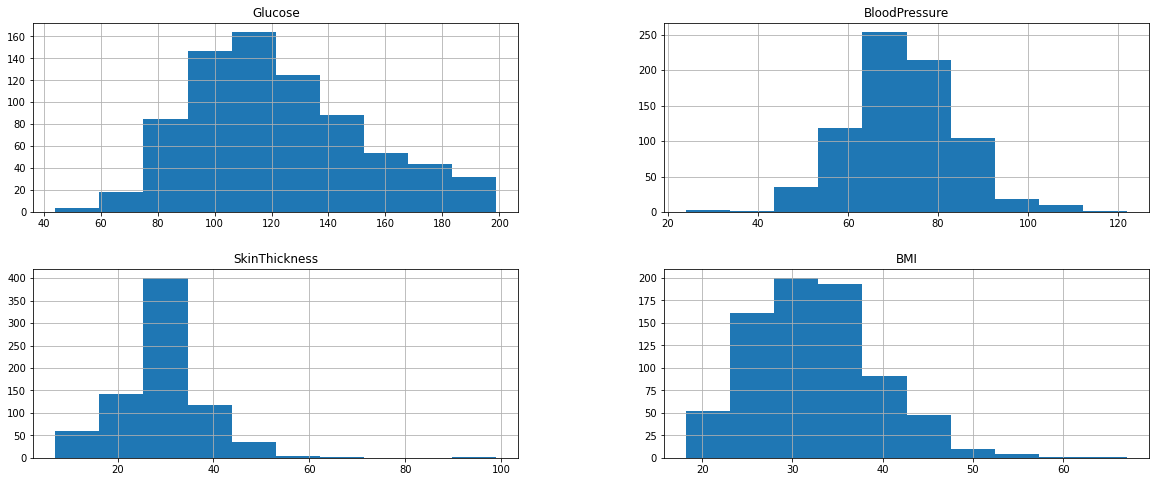

In [33]:
diabetes_clean[['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']].hist(figsize=(20, 8));

In [34]:
# Чему равно среднее значение в столбце SkinThickness? Ответ округлите до десятых.
round(diabetes_clean['SkinThickness'].mean(), 1)

29.1

In [35]:
def outliers_iqr(df, feature, log_scale=False, left=1.5, right=1.5):
    """
    Функция для определения выбросов по методу Тьюки.

    :param df: Исходный датафрейм
    :param feature: Фитча датафрейма для определения выбросов
    :param log_scale: Нужно ли логарифмировать рассмативаемый признак
    :param left: Множитель для определения левой границы выброса, по умолчанию 1.5
    :param right: Множитель для определения правой границы выброса, по умолчанию 1.5
    :return: Функция возвращает датафрейм с выбросами и отчищенный от выбросов датафрейм
    """

    x = df[feature]

    if log_scale:
        x = np.log(x)

    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = df[(x < lower_bound) | (x > upper_bound)]
    cleaned = df[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [36]:
# Сколько выбросов найдёт классический метод межквартильного размаха в признаке SkinThickness?
outliers, cleaned = outliers_iqr(diabetes_clean, 'SkinThickness')
outliers.shape[0]

87

In [37]:
def outliers_z_score(df, feature, log_scale=False, left=3, right=3):
    """
    Функция для определения выбросов по методу 3х сигм

    :param df: Исходный датафрейм
    :param feature: Фитча датафрейма для определения выбросов
    :param log_scale: Нужно ли логарифмировать рассмативаемый признак
    :return: Функция возвращает датафрейм с выбросами и отчищенный от выбросов датафрейм
    """

    current_series = df[feature]

    if log_scale:
        # Если в серии минимальное значение 0,
        # то небходимо добавить 1 во всю серии, т.к. логарифм от 0 невозможен
        current_series = np.log(current_series + 1)

    mu = current_series.mean()
    sigma = current_series.std()

    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma

    outliers = df[(current_series < lower_bound) | (current_series > upper_bound)]
    cleaned = df[(current_series > lower_bound) & (current_series < upper_bound)]

    return outliers, cleaned

In [38]:
# Сколько выбросов найдёт классический метод z-отклонения в признаке SkinThickness?
outliers, cleaned = outliers_z_score(diabetes_clean, 'SkinThickness')
outliers.shape[0]

4

In [ ]:
# На приведённой гистограмме показано распределение признака DiabetesPedigreeFunction. 
# Такой вид распределения очень похож на логнормальный, и он заставляет задуматься о логарифмировании признака.

# Найдите сначала число выбросов в признаке DiabetesPedigreeFunction с помощью классического метода межквартильного размаха.
# Затем найдите число выбросов в этом же признаке в логарифмическом масштабе (при логарифмировании единицу прибавлять не нужно!). 
# Какова разница между двумя этими числами (вычтите из первого второе)?

Text(0.5, 1.0, 'Распределение функции родословной диабета (log)')

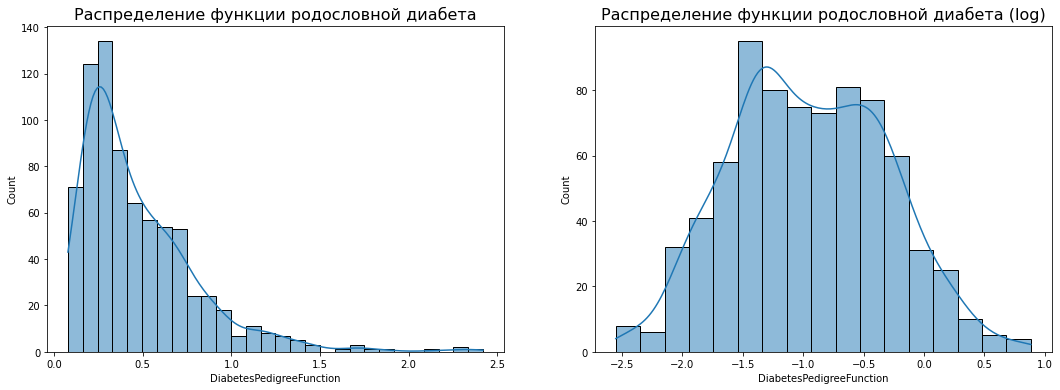

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
hist0=sns.histplot(data=diabetes_clean, x='DiabetesPedigreeFunction', kde='mean', ax=ax[0])
hist0.set_title('Распределение функции родословной диабета', fontsize=16)

hist1=sns.histplot(data=np.log(diabetes_clean['DiabetesPedigreeFunction']), kde='mean', ax=ax[1])
hist1.set_title('Распределение функции родословной диабета (log)', fontsize=16)

In [56]:
outliers, cleaned = outliers_iqr(diabetes_clean, 'DiabetesPedigreeFunction')
outliers0 = outliers.shape[0]

outliers, cleaned = outliers_iqr(diabetes_clean, 'DiabetesPedigreeFunction', log_scale=True)
outliers1 = outliers.shape[0]

outliers0 - outliers1


29

[1000000, 400000]
700000.0
